Приветствую! Перед вами решение задачи по определению дефолта у ипотечных заёмщиков США, содержащей более 5950 наблюдений. Безусловно, такая задача интересна и сама по себе. Обучив модель, можно предсказывать дальнейшее развитие событий относительно каждого конкретно взятого заёмщика. Однако, скорее всего, подобные данные не останются лишь в стенах банков, а используются различными организациями, имеющими дела с социумом. Вполне вероятно, что по данному набору данных можно попытаться извлечь некий социальный портрет каждого объекта, а затем пытаться кластеризовать их, преследуя уже совсем другие цели. например, предпочтения относительно дорогих покупок, если задачу решает некий ритейлер, либо добавочный коэффициент страхования, если заинтересованы страховщики. Забавная ситуация произошла в офисе одного из амеркианских магазинов Target, предсказав у одной из своих посетительниц беременность, отнеся её к кластеру точно беременных клиенток на основе их поведения. 

Однако я всё же буду решать задачу детектирования наступления дефолта у заёмщика, либо его отсутствия. Анализируемый датасет имеет следующие переменные. Итак, предикторы:

LOAN - сумма запроса кредита

MORTDUE - текущая сумма ипотеки

VALUE - стоимость текущей недвижимости

REASON: DebtCon - погашение задолженности, HomeImp - улучшение жилищных условий

JOB - род занятости

YOJ - количество лет на текщей работе

DEROG - количество негативных пометок на кредитной истории

DELINQ - количество просроченных кредитных погашений

CLAGE - количество в месяцах самой старой кредитной истории

NINQ - количество последних кредитных запросов

CLNO - количество кредитов

DEBTINC - отношение долгов к доходам

А предсказывать мы будем дефолт

BAD: 1 - не погасит, 0 - погасит

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [96]:
#Подгрузим данные (укажите свой путь)
df = pd.read_csv('c:/test/ind/hmeq.csv')
df.head(10)

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
5    1  1700  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0   
6    1  1800  48649.0   57037.0  HomeImp   Other   5.0    3.0     2.0   
7    1  1800  28502.0   43034.0  HomeImp   Other  11.0    0.0     0.0   
8    1  2000  32700.0   46740.0  HomeImp   Other   3.0    0.0     2.0   
9    1  2000      NaN   62250.0  HomeImp   Sales  16.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0        NaN  
1  121.833333   0.0  14.0        NaN  
2  149.466667   1.0  10.0        NaN  
3         NaN   NaN   NaN        NaN  
4   93.333333   0.0  14.0        NaN  
5  101.466002   1.0   8.0  37.113614  
6   77.100000   1.0  17.0        NaN  
7   88.766030   0.0   8.0  36.884894  
8  216.933333   1.0  12.0        NaN  
9  115.800000   0.0  13.0        NaN

In [97]:
#Посмотрим на общую характеристику данных
df.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11100.000000   46276.000000   66075.500000     3.000000   
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000   
75%       0.000000  23300.000000   91488.000000  119824.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000   
mean      0.254570     0.449442   179.766275     1.186055    21.296096   
std       0.846047     1.127266    85.810092     1.728675    10.138933   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   115.116702     0.000000    15.000000   
50%       0.000000     0.000000   173.466667     1.000000    20.000000   
75%       0.000000     0.000000   231.562278     2.000000    26.000000   
max      10.000000    15.000000  1168.233561    17.000000    71.000000   

           DEBTINC  
count  4693.000000  
mean     33.779915  
std       8.601746  
min       0.524499  
25%      29.140031  
50%      34.818262  
75%      39.003141  
max     203.312149

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Как видно, в данных имеется немало пропусков. и если такие переменные как VALUE или CLAGE имеют относительное небольшое число пробелов, которые вполне безболезненно можно заменить на средние или медианные значения по столбцу, то с переменной DEBTINC дела обстоят несоклько сложнее в первую очередь из большого количесвта пропусков (порядка 20%). Однако взглянув на описательную таблицу выше, можно заметить, что среднее практически совпадает с медианой. Что ж, в таком случае так же будем использовать cреднее или медианное.

In [99]:
#Заполним пропуски для того, чтобы приступить к удобному визуальному анализу.

#В большинстве случаев будем порльзоваться медианным значением
df[['MORTDUE']] = df[['MORTDUE']].fillna(65000)
df[['VALUE']] = df[['VALUE']].fillna(89200)
df[['YOJ']] = df[['YOJ']].fillna(7)
df[['MORTDUE']] = df[['MORTDUE']].fillna(65000)
df[['DEROG']] = df[['DEROG']].fillna(0)
df[['DEROG']] = df[['DEROG']].fillna(0)
df[['DELINQ']] = df[['DELINQ']].fillna(0)
df[['CLAGE']] = df[['CLAGE']].fillna(179)
df[['NINQ']] = df[['NINQ']].fillna(0)
df[['CLNO']] = df[['CLNO']].fillna(0)
df[['DEBTINC']] = df[['DEBTINC']].fillna(0)

In [100]:
#Бинаризуем переменную Reason
df['REASON'] = df['REASON'].map({'DebtCon' : 0, 'HomeImp' : 1})

In [101]:
df['REASON'].value_counts()
#Как видим, больше половины объектов относятся к классу 0, поэтому заполним пропуски так же на 0

0.0    3928
1.0    1780
Name: REASON, dtype: int64

In [102]:
df['REASON'] = df['REASON'].fillna(0)

In [103]:
#Категоризуем переменную JOB
encoder = LabelEncoder().fit_transform(df["JOB"].astype(str))
df[["JOB"]] = encoder

Посомтрим на анализируемый датасет теперь и посмотрим, удалось ли нам полностью подготовить данные для дальнейшего анализа.

In [104]:
df.head(10)

BAD  LOAN  MORTDUE     VALUE  REASON  JOB   YOJ  DEROG  DELINQ       CLAGE  \
0    1  1100  25860.0   39025.0     1.0    2  10.5    0.0     0.0   94.366667   
1    1  1300  70053.0   68400.0     1.0    2   7.0    0.0     2.0  121.833333   
2    1  1500  13500.0   16700.0     1.0    2   4.0    0.0     0.0  149.466667   
3    1  1500  65000.0   89200.0     0.0    6   7.0    0.0     0.0  179.000000   
4    0  1700  97800.0  112000.0     1.0    1   3.0    0.0     0.0   93.333333   
5    1  1700  30548.0   40320.0     1.0    2   9.0    0.0     0.0  101.466002   
6    1  1800  48649.0   57037.0     1.0    2   5.0    3.0     2.0   77.100000   
7    1  1800  28502.0   43034.0     1.0    2  11.0    0.0     0.0   88.766030   
8    1  2000  32700.0   46740.0     1.0    2   3.0    0.0     2.0  216.933333   
9    1  2000  65000.0   62250.0     1.0    4  16.0    0.0     0.0  115.800000   

   NINQ  CLNO    DEBTINC  
0   1.0   9.0   0.000000  
1   0.0  14.0   0.000000  
2   1.0  10.0   0.000000  
3   0.0   0.0   0.000000  
4   0.0  14.0   0.000000  
5   1.0   8.0  37.113614  
6   1.0  17.0   0.000000  
7   0.0   8.0  36.884894  
8   1.0  12.0   0.000000  
9   0.0  13.0   0.000000

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null float64
JOB        5960 non-null int64
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(10), int64(3)
memory usage: 605.4 KB


Пропусков действительно нет, приступим к графическому анализу.

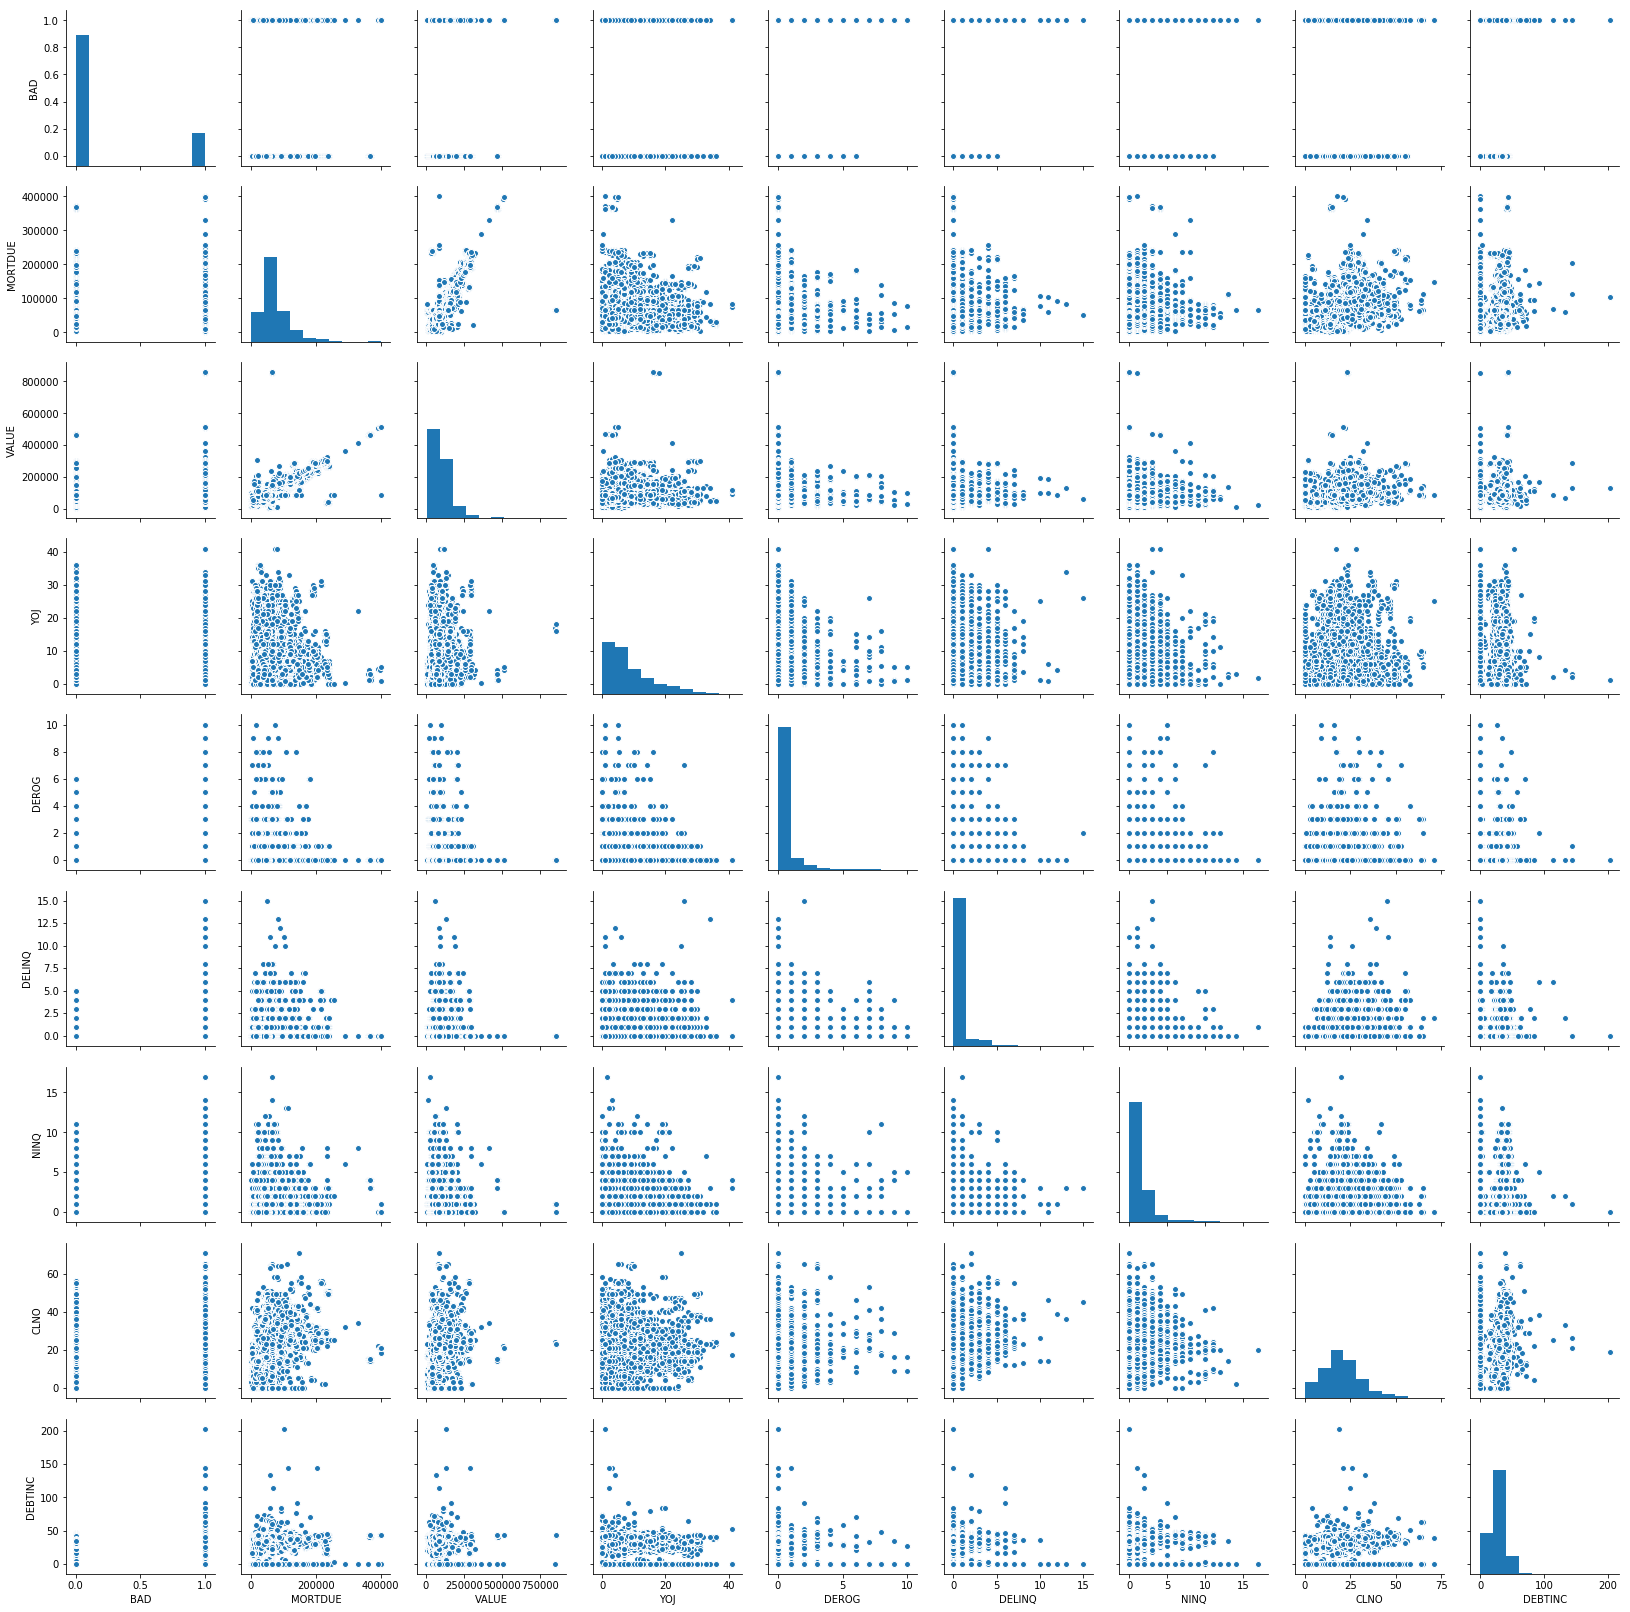

In [106]:
sns.pairplot(df[['BAD', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'NINQ', 'CLNO', 'DEBTINC']])

Каких-то явных закономерностей, помиомо того, что с ростом стоимости приобритаемого жилья растёт и стоимость ипотеки, нет. Стоит отметить почти идентичную зависимость у количества негативных пометок на кредитной истории и количества просроченных платежей относительно суммы займа, причём сумма займа в общей массе не превышает 0,25 квартиля, что свидетельствует об относительно небольших займах.

Интересно, а есть ли какие-нибудь профессии, среди которых присутствует наибольшее количество злостных неплательщиков, либо кредитных потребителей?

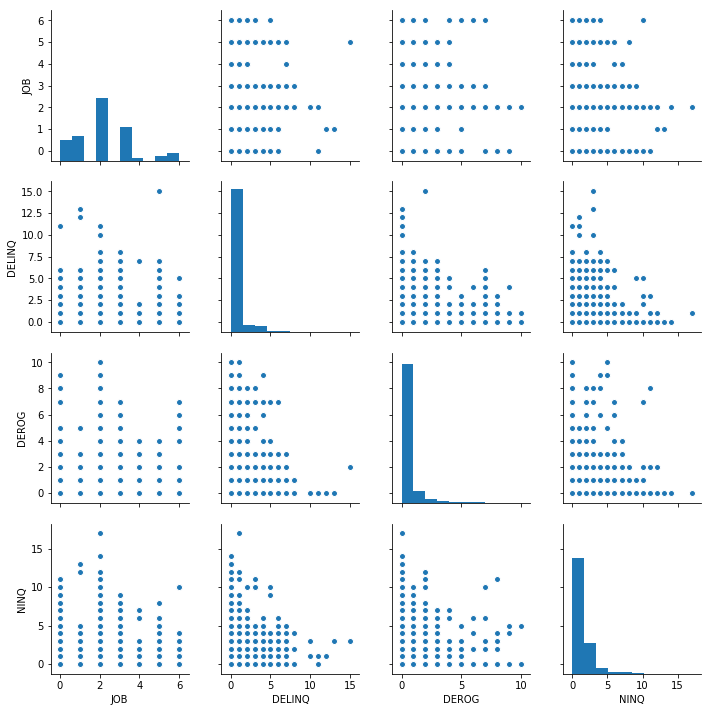

In [107]:
sns.pairplot(df[['JOB', "DELINQ", "DEROG", 'NINQ']])

Нет, каких-то явных суждений на этот счёт сделать нельзя. На всякий случай дополнительно отрисуем корреляционную матрицу.

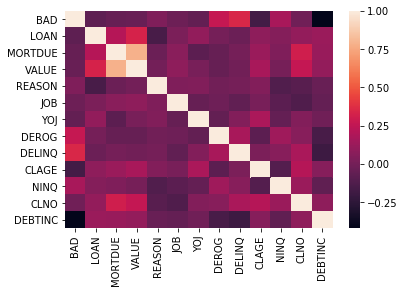

In [108]:
sns.heatmap(df.corr())

А тут уже вырисовывется более интересная картинка. Предположение о наибольшей зависимости между стоимостью жилья и ипотеки выполняется. Но по началу я даже не обратил внимания, что между суммой ипотеки и заявкой на кредит существует зависимость. Более того, между длиной кредитной истории и вероятностью насткпления дефолта существует заметная зависимость, но с отрицательным знаком. И сильная отрицательная (если даже не отрицательная функциональная) между отношением долгов к доходам и вероятностью дефолта.

Предварительно сделаем следующий вывод: С увеличением кредитных просрочек и негативнх пометках на кредитной истории, вероятность дефолта увеличивается. Однако, чем дольше заёмщик берёт кредиты, и чем нже отношение долгов к доходам, тем менее вероятность наступления дефолта.

Для того, чтобы выбрать метрику, на основании которой мы будем строить модели, посмотрим на целевой признак.

(array([4771.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1189.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

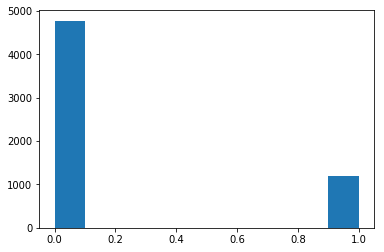

In [109]:
plt.hist(df['BAD'])

Видим явную несбалансировать классов, поэтому о простом accuracy_score можено забыть. В данном случе стоит подумать о бизнес-составляющей нашей задачи. Что важнее: отклассифицировать нехороших плательщиков, пожертвовав хорошими? Или найти как можно больше нехороших неплательщиков? Что ж, будем рисовать roc auc, чтобы оценивать модель в целом.

Поробуем 4 агоритма: логистическкую регрессию, метод к-ближайших, а так же случайный лес и градиентный бустинг (куда же без них).

In [171]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

И займёмся финальной подготовкой данных: применим стандартизацию (чтобы избежать сильного влияния каких-то отдельных предикторов для линейки), извлечём целевой признак, а так же поделим выборку на тренировочную, валидационную и тестовую.

In [111]:
y = df[['BAD']]
X = df.drop('BAD', axis = 1)

In [112]:
#Создадим дамми-переменные для JOB
dummies_job = pd.get_dummies(df['JOB'], prefix = 'JOB')
X = pd.concat([X, dummies_job], axis = 1)
X = X.drop('JOB', axis = 1)

In [117]:
#Стандартизируем переменные
for i in X.columns:
    scaler = StandardScaler().fit_transform(X[[i]])
    X[i] = scaler

In [118]:
X.head()

LOAN   MORTDUE     VALUE    REASON       YOJ     DEROG    DELINQ  \
0 -1.562299 -1.107873 -1.099357  1.532421  0.240237 -0.280976 -0.375943   
1 -1.544453 -0.069246 -0.582781  1.532421 -0.241936 -0.280976  1.477341   
2 -1.526606 -1.398358 -1.491955  1.532421 -0.655226 -0.280976 -0.375943   
3 -1.526606 -0.188002 -0.217001 -0.652562 -0.241936 -0.280976 -0.375943   
4 -1.508759  0.582865  0.183950  1.532421 -0.792990 -0.280976 -0.375943   

      CLAGE      NINQ      CLNO   DEBTINC     JOB_0     JOB_1     JOB_2  \
0 -1.021588 -0.050160 -1.071643 -1.684766 -0.384316 -0.434909  1.223034   
1 -0.692867 -0.643324 -0.605827 -1.684766 -0.384316 -0.434909  1.223034   
2 -0.362151 -0.050160 -0.978480 -1.684766 -0.384316 -0.434909  1.223034   
3 -0.008697 -0.643324 -1.910113 -1.684766 -0.384316 -0.434909 -0.817639   
4 -1.033955 -0.643324 -0.605827 -1.684766 -0.384316  2.299330 -0.817639   

      JOB_3     JOB_4     JOB_5     JOB_6  
0 -0.521936 -0.136489 -0.182938 -0.221610  
1 -0.521936 -0.136489 -0.182938 -0.221610  
2 -0.521936 -0.136489 -0.182938 -0.221610  
3 -0.521936 -0.136489 -0.182938  4.512428  
4 -0.521936 -0.136489 -0.182938 -0.221610

In [120]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)

In [159]:
#Приступаем к построениею моделей
models = []
models.append(RandomForestClassifier(n_estimators=150, max_depth=4))
models.append(XGBClassifier(max_depth = 4))
models.append(KNeighborsClassifier(n_neighbors=15))
models.append(LogisticRegressionCV())

#Поскольку у нас есть и категориальные, и непрерывные признаки, то, скорее всего, деревья будут лучше справляться

In [160]:
results = []
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_valid)[:, 1]
    results.append(roc_auc_score(y_valid, preds))

C:\Users\DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [161]:
#Как и предполагалось, именно деревья лучше всего справляются с задачей, остановимся на XGB и будем настраивать его
results

[0.9181766267440425,
 0.9464420761822446,
 0.9072387408939376,
 0.8728064421533522]

In [165]:
xgb_model = XGBClassifier()
xgb_params = {'max_depth' : [3, 4, 5, 6, 7, 8], 'n_estimators' : [100, 500, 1000]}
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid = GridSearchCV(xgb_model, xgb_params, cv = cv)

In [167]:
grid.fit(X_train, y_train)

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8], 'n_estimators': [100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [169]:
xgb_params = {'max_depth' : [6], 'n_estimators' : [400, 500, 600]}
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid = GridSearchCV(xgb_model, xgb_params, cv = cv)
grid.fit(X_train, y_train)
grid.best_estimator_

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

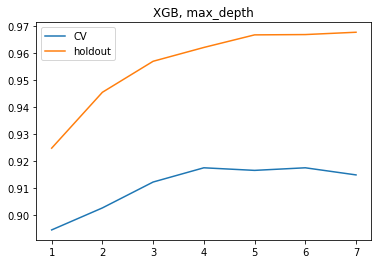

In [175]:
#Построение кривых валидации от глубины дерева
cv_scores = []
holdout_scores = []
for i in range(1, 8):
    xgb = XGBClassifier(max_depth=i, n_estimators=400)
    cv_scores.append(np.mean(cross_val_score(xgb, X_train, y_train, cv=5)))
    xgb.fit(X_train, y_train)
    holdout_scores.append(roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1]))
    
plt.plot(range(1, 8), cv_scores, label='CV')
plt.plot(range(1, 8), holdout_scores, label='holdout')
plt.title('XGB, max_depth')
plt.legend();


In [181]:
#
#Сделаем предсказания для  отложки и оценим качество
xgb = XGBClassifier(n_estimators=400, max_depth=6)
xgb.fit(X_train, y_train)
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9668940609951847

Веьма неплохо, но никто не сказал, что данные для анализа выложены в открытый доступ в корректном виде.

Решая подобные задачи ежедневно, банки снижают многочисленные финансовые риски. Если подорбного не было, то это было бы похоже на лотерею.